### W tym projekcie chiałbym utworzyć i wytrenować model do klasyfikowania czy dana osoba może mieć chorobę serca czy nie.
Będę korzystać z funkcji które dostarcza nam biblioteka sckit-learn:
https://scikit-learn.org/stable/index.html


In [1]:
#Podstawowe importy
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Dane zostały pobrane ze strony kaggle:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

In [2]:
# Import danych
hearth_disease = pd.read_csv('data/heart.csv')
hearth_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Sprawdzamy czy zbiór nie posiada pustych wartości
hearth_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Do zbudowania modelu do uczenia maszynowego musimy podzielić zbór na dane z których ma się uczyć 
# oraz target(to co ma przewidywać)
X = hearth_disease.drop("target", axis=1)
y = hearth_disease["target"]

Dzielimy dane na treningowe i testowe. Uzyjemy do tego Sckit-learn

In [5]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)# dajemy 20% danych do zbioru testowego



Po podzieleniu sprawdzając mapę do uczenia maszynowego ze strony Sckit-learn:
Do dopasowania używam schematu(https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html):
<img src="../hearth_desease/ml_map.png"/>
Używam RandomForestClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Przypisujemy model
clf = RandomForestClassifier()

#Dopasowujemy dane
clf.fit(X_train, y_train)
# robimy przewidywania(predykcje)
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [8]:
# Nic nam to jeszcze nie mówi więc sprawdzamy wynik(score)
clf.score(X_test,y_test)

0.9804878048780488

Model posiada zgodnośc na wysokim poziomie, jednak dla testów sprawdzimy także inne modele, czy jakiś jest w stanie poradzic sobie lepiej, choć ten wynik jest moim zdaniem wysoce zadowalający.
Chciałbym zebrać modele w słowniku i móc je porównać. Wybrane modele to:
* RandomForestClassifier (do porówniania)
* KNeighborsClassifier
* NuSVC
* LogisticRegression
* SVC

In [55]:
# Importy
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Tworzymy słownik z modelami
models = {"RandomForestClassifier": RandomForestClassifier(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "NuSVC": NuSVC(),
          "LogisticRegression": LogisticRegression(solver='liblinear'), # wartość domyśla wywalała błąd iteracji niezależnie od zmiany
          "SVC": SVC()}

# Pusty słownik na wyniki
results={}


Jako, że każdy z modelu uzywa takich samych funckcji `fit()` i `score()` tworzymy pętlę aby przejść przez nie

In [56]:
for model_name, model in models.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

{'RandomForestClassifier': 0.9804878048780488,
 'KNeighborsClassifier': 0.7707317073170732,
 'NuSVC': 0.8390243902439024,
 'LogisticRegression': 0.8439024390243902,
 'SVC': 0.6878048780487804}

Chcemy wyświetlić wyniki na wykresie

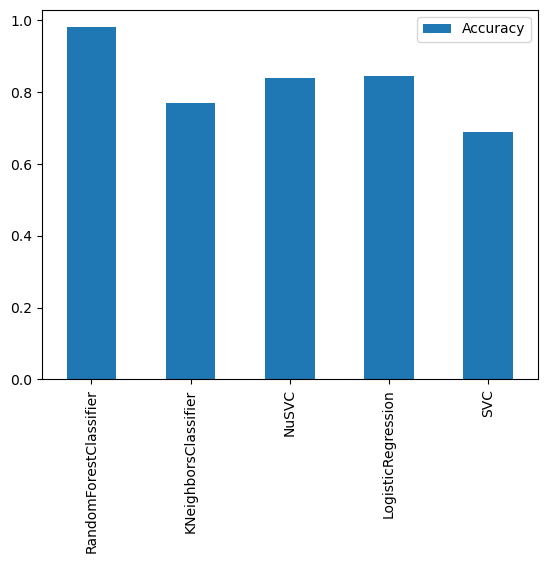

In [59]:
results_hearth = pd.DataFrame(results.values(),
                              results.keys(),
                              columns=["Accuracy"])
results_hearth.plot.bar();

Widzimy, że żaden inny model nie był w stanie pokonać RandomForestClassifier w przewidywaniach. 
Sprawdźmy czy zmiana hyperpatametrów dla naszego najlepszego modelu jest w stanie jeszcze bardziej poprawić jego wyniki.

In [60]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
# Definiujemy je w słowniku
rand_cls_grid = {"criterion":["gini", "entropy", "log_loss"],
                 "max_features":["sqrt", "log2", None],
                 "n_estimators":[100,200,500,1000],} 

In [65]:
# użyjemy RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rand_cls_reg = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=rand_cls_grid,
                                 cv=10,
                                 n_iter=5,
                                 verbose=True)

# Dopasowujemy dane
rand_cls_reg.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=True)

Sprawdzimy teraz najlepszy wynik

In [66]:
rand_cls_reg.best_params_

{'n_estimators': 500, 'max_features': 'log2', 'criterion': 'gini'}

In [67]:
rand_cls_reg.score(X_test,y_test)

0.9804878048780488

Wynik jest taki sam jak poprzednio, nie możemy pobić wyniku, możliwe, że większa ilość danych mogłaby podnieść skureczność modelu.

Nie będziemy ustawiać nowych parametrów dla modelu ponieważ wynik był ten sam
Chcemy jeszcze użyć jeszcze kilku metryk oceny:
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* RocCurveDisplay

In [71]:
# Imports
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             precision_score, 
                             recall_score, 
                             f1_score,
                             RocCurveDisplay)

In [72]:
# Confusion matrix
confusion_matrix(y_test,y_preds)

array([[ 96,   4],
       [  0, 105]], dtype=int64)

Stworzymy wizualizację aby lepiej zobrazować wartości

Confusion matrix
[[ 96   4]
 [  0 105]]


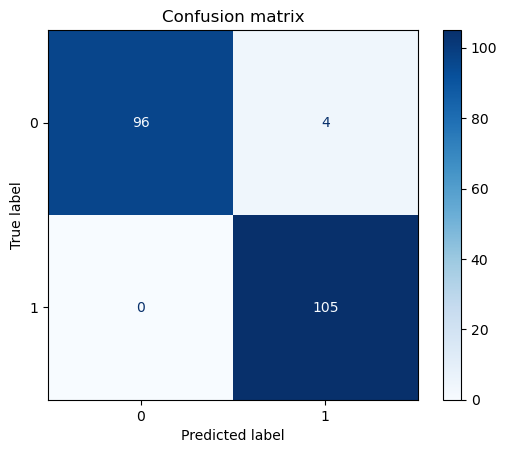

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=None,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title("Confusion matrix")

print(title)
print(disp.confusion_matrix)

plt.show()

In [78]:
# Tworzymy classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.96      1.00      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [79]:
# Znajdujemy precision score za pomocą precision_score()
print(precision_score(y_test,y_preds))

0.963302752293578


In [80]:
#  Recall score
print(recall_score(y_test,y_preds))

1.0


In [81]:
# F1 score
print(f1_score(y_test,y_preds))

0.9813084112149533


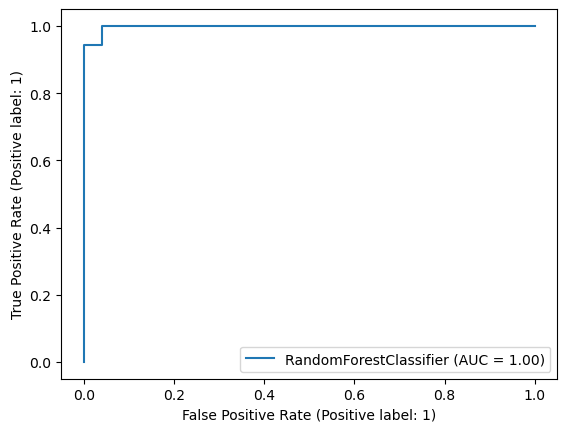

In [82]:
# Tworzymy ROC curve używając RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test);

Końcowo tak dobrze prosperujący model możemy zapisać i wykorzystać ponownie. Użyjemy do tego `joblib`

In [84]:
from joblib import dump

dump(clf, 'hearth_disease_clf.joblib')

['hearth_disease_clf.joblib']